In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bureau = pd.read_csv('D:/Dataset/bureau.csv')
application_train = pd.read_csv('D:/Dataset/application_train.csv')
data_gabungan_1 = pd.merge(application_train, bureau, on= 'SK_ID_CURR', how='inner')
data_gabungan_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


In [2]:
(data_gabungan_1['DAYS_BIRTH']/-365).describe()

count    1.465325e+06
mean     4.471946e+01
std      1.141669e+01
min      2.051781e+01
25%      3.544658e+01
50%      4.375616e+01
75%      5.428493e+01
max      6.904384e+01
Name: DAYS_BIRTH, dtype: float64

In [3]:
missing_values = data_gabungan_1.isnull().sum()
threshold = len(data_gabungan_1) * 0.5
columns_to_drop = missing_values[missing_values > threshold].index
data_dropped = data_gabungan_1.drop(columns=columns_to_drop)
data = data_dropped

In [4]:
data = data.fillna(data.median())
data.update(data)
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8364\4185127070.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median())


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,-1038.0,-1038.0,0,40761.0,0.0,0.0,0.0,Credit card,-1038
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,-334.0,-48.0,0,0.0,0.0,0.0,0.0,Credit card,-47
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,-1072.0,-1185.0,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,-911.0,-911.0,0,19071.0,0.0,0.0,0.0,Consumer credit,-906
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,85.0,-36.0,0,120735.0,0.0,0.0,0.0,Consumer credit,-34


In [5]:
jumlah_gagal_bayar = data_gabungan_1[data_gabungan_1 ['TARGET'] == 1].shape[0]
jumlah_berhasil_bayar = data_gabungan_1[data_gabungan_1['TARGET'] == 0].shape[0]

total_data = data_gabungan_1.shape[0]

persentase_gagal_bayar = (jumlah_gagal_bayar/total_data)*100
persentase_berhasil_bayar = (jumlah_berhasil_bayar/total_data)*100

print("Persentase Gagal Bayar:", persentase_gagal_bayar,"%")
print("Persentase Berhasil Bayar:", persentase_berhasil_bayar, "%")

Persentase Gagal Bayar: 7.815331069899169 %
Persentase Berhasil Bayar: 92.18466893010083 %


Persentase Gagal Bayar :7.8153%
Persentase Berhasil Bayar :92.1847


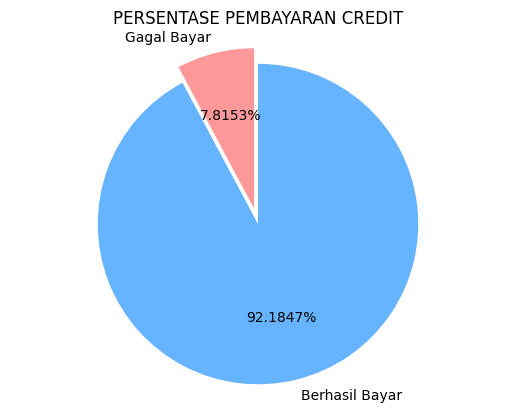

In [6]:
total_pelanggan = data_gabungan_1['TARGET'].value_counts()
jumlah_gagal_bayar = total_pelanggan[1]
jumlah_berhasil_bayar = total_pelanggan[0]

Failed_percentage = (jumlah_gagal_bayar/len(data_gabungan_1))*100
Success_percentage = (jumlah_berhasil_bayar/len(data_gabungan_1))*100

print("Persentase Gagal Bayar :{:.4f}%".format(Failed_percentage))
print("Persentase Berhasil Bayar :{:.4f}".format(Success_percentage))

labels = ['Gagal Bayar','Berhasil Bayar']
sizes = [Failed_percentage, Success_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', startangle=90)
plt.axis('equal')
plt.title("PERSENTASE PEMBAYARAN CREDIT")
plt.show()

In [20]:
jumlah_pria = data_gabungan_1[data_gabungan_1 ['CODE_GENDER'] == 'M'].shape[0]
jumlah_wanita = data_gabungan_1[data_gabungan_1 ['CODE_GENDER'] == 'F'].shape[0]

total_data = data_gabungan_1.shape[0]

persentase_pria = (jumlah_pria/total_data)*100
persentase_wanita = (jumlah_wanita/total_data)*100

print("Persentase Pria:", persentase_pria,"%")
print("Persentase Wanita:", persentase_wanita, "%")

Persentase Pria: 31.6478596898299 %
Persentase Wanita: 68.34982000580077 %


Persentase Pria :31.6479%
Persentase Wanita :68.3498


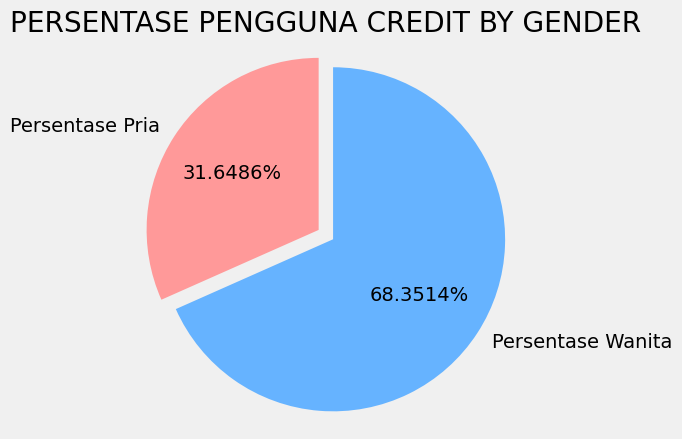

In [21]:
total_pelanggan = data_gabungan_1['CODE_GENDER'].value_counts()
jumlah_pria = total_pelanggan['M']
jumlah_wanita= total_pelanggan['F']

persentase_pria = (jumlah_pria/len(data_gabungan_1))*100
persentase_wanita = (jumlah_wanita/len(data_gabungan_1))*100

print("Persentase Pria :{:.4f}%".format(persentase_pria))
print("Persentase Wanita :{:.4f}".format(persentase_wanita))

labels = ['Persentase Pria','Persentase Wanita']
sizes = [persentase_pria, persentase_wanita]
colors = ['#ff9999','#66b3ff']
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', startangle=90)
plt.axis('equal')
plt.title("PERSENTASE PENGGUNA CREDIT BY GENDER")
plt.show()

In [24]:
credit_card = data_gabungan_1[data_gabungan_1 ['CREDIT_TYPE'] == 'Credit card'].shape[0]
consumer_credit = data_gabungan_1[data_gabungan_1 ['CREDIT_TYPE'] == 'Consumer credit'].shape[0]

total_data = data_gabungan_1.shape[0]

persentase_credit_card= (credit_card/total_data)*100
persentase_consumer_credit = (consumer_credit/total_data)*100

print("Persentase Credit Card:", persentase_credit_card,"%")
print("Persentase Consumer Credit:", persentase_consumer_credit, "%")

Persentase Credit Card: 23.465988773821508 %
Persentase Consumer Credit: 72.99472813198437 %


Persentase Credit Card :23.4660%
Persentase Consumer Credit :72.9947


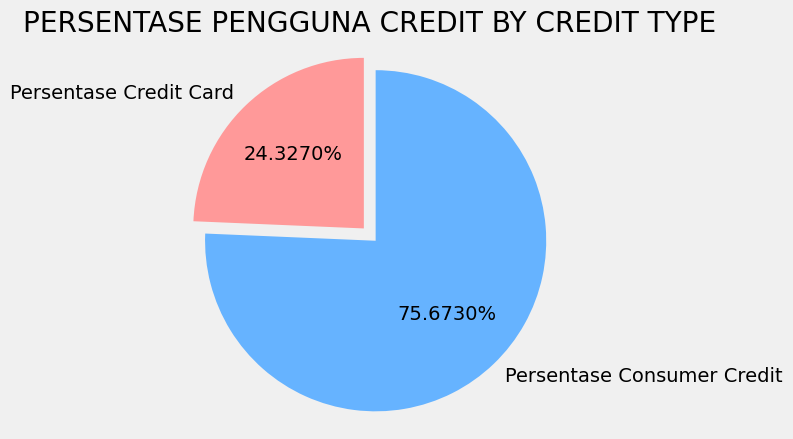

In [25]:
total_pelanggan = data_gabungan_1['CREDIT_TYPE'].value_counts()
jumlah_credit_card = total_pelanggan['Credit card']
jumlah_consumer_credit= total_pelanggan['Consumer credit']

persentase_credit_card = (jumlah_credit_card/len(data_gabungan_1))*100
persentase_consumer_credit = (jumlah_consumer_credit/len(data_gabungan_1))*100

print("Persentase Credit Card :{:.4f}%".format(persentase_credit_card))
print("Persentase Consumer Credit :{:.4f}".format(persentase_consumer_credit))

labels = ['Persentase Credit Card','Persentase Consumer Credit']
sizes = [persentase_credit_card, persentase_consumer_credit]
colors = ['#ff9999','#66b3ff']
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', startangle=90)
plt.axis('equal')
plt.title("PERSENTASE PENGGUNA CREDIT BY CREDIT TYPE")
plt.show()

In [7]:
data_gabungan_1['DAYS_BIRTH']=abs(data_gabungan_1['DAYS_BIRTH'])
data_gabungan_1['DAYS_BIRTH'].corr(data_gabungan_1['TARGET'])

-0.06688789433121717

Text(0, 0.5, 'Count')

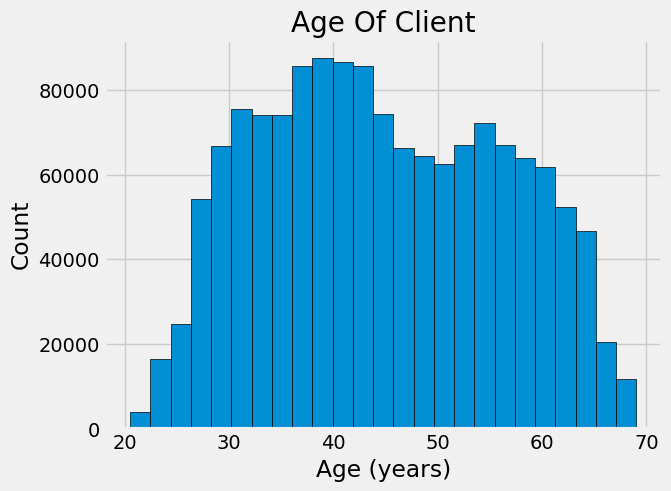

In [8]:
plt.style.use('fivethirtyeight')

plt.hist(data_gabungan_1['DAYS_BIRTH']/365, edgecolor= 'k', bins=25)
plt.title('Age Of Client') ; plt.xlabel('Age (years)') ; plt.ylabel('Count')

In [9]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['TARGET'].abs().sort_values(ascending=False)
correlation_with_target.head(50)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8364\1183565002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


TARGET                         1.000000
EXT_SOURCE_3                   0.181616
EXT_SOURCE_2                   0.146015
DAYS_BIRTH                     0.066888
DAYS_CREDIT                    0.061556
REGION_RATING_CLIENT_W_CITY    0.050320
REGION_RATING_CLIENT           0.048372
DAYS_ID_PUBLISH                0.042199
DAYS_LAST_PHONE_CHANGE         0.041996
DAYS_CREDIT_UPDATE             0.041076
REG_CITY_NOT_WORK_CITY         0.039903
FLAG_DOCUMENT_3                0.039643
REG_CITY_NOT_LIVE_CITY         0.036047
FLOORSMAX_AVG                  0.035476
FLOORSMAX_MEDI                 0.035264
FLOORSMAX_MODE                 0.034686
FLAG_EMP_PHONE                 0.033979
DAYS_ENDDATE_FACT              0.033546
DAYS_EMPLOYED                  0.032887
DAYS_REGISTRATION              0.032541
AMT_GOODS_PRICE                0.030594
REGION_POPULATION_RELATIVE     0.027037
DEF_30_CNT_SOCIAL_CIRCLE       0.026449
LIVE_CITY_NOT_WORK_CITY        0.026302
AMT_REQ_CREDIT_BUREAU_YEAR     0.025900


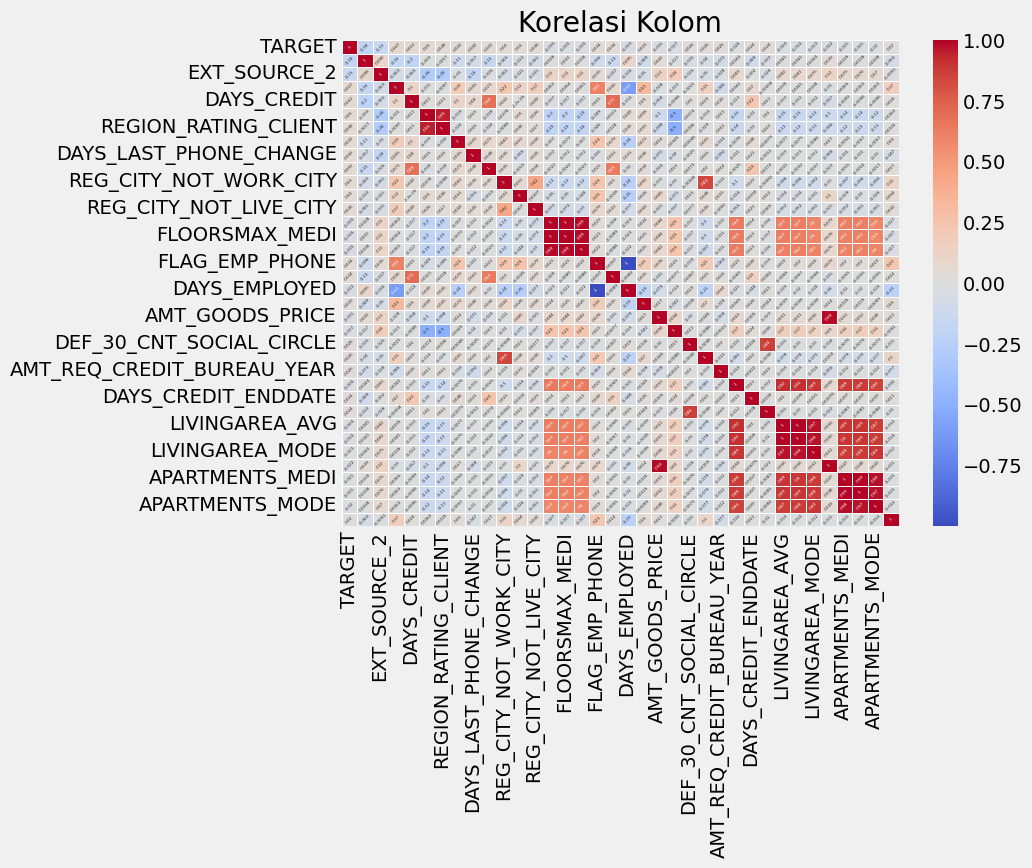

In [10]:
relevant_features = correlation_with_target[correlation_with_target > 0.02].index
subset_data = data[relevant_features]
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm', annot_kws={"rotation": 45, "fontsize": 3}, linewidths=0.7)
plt.title('Korelasi Kolom')
plt.show()

In [11]:
subset_data.drop('TARGET', axis=1, inplace=True)
subset_data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8364\3133215669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.drop('TARGET', axis=1, inplace=True)


,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,DAYS_CREDIT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_CREDIT_UPDATE,REG_CITY_NOT_WORK_CITY,...,DAYS_CREDIT_ENDDATE,DEF_60_CNT_SOCIAL_CIRCLE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,AMT_CREDIT,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,FLAG_WORK_PHONE
0,0.139376,0.262949,-9461,-1125,2,2,-2120,-1134.0,-1038,0,...,-1038.0,2.0,0.019,0.0193,0.0198,406597.5,0.025,0.0247,0.0252,0
1,0.139376,0.262949,-9461,-476,2,2,-2120,-1134.0,-47,0,...,-334.0,2.0,0.019,0.0193,0.0198,406597.5,0.025,0.0247,0.0252,0
2,0.139376,0.262949,-9461,-1437,2,2,-2120,-1134.0,-1185,0,...,-1072.0,2.0,0.019,0.0193,0.0198,406597.5,0.025,0.0247,0.0252,0
3,0.139376,0.262949,-9461,-1121,2,2,-2120,-1134.0,-906,0,...,-911.0,2.0,0.019,0.0193,0.0198,406597.5,0.025,0.0247,0.0252,0
4,0.139376,0.262949,-9461,-645,2,2,-2120,-1134.0,-34,0,...,85.0,2.0,0.019,0.0193,0.0198,406597.5,0.025,0.0247,0.0252,0


In [12]:
x = subset_data
y = data['TARGET']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)
print("Jumlah data train:", len(x_train))
print("Jumlah data test:", len(x_test))

Jumlah data train: 1172260
Jumlah data test: 293065


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

log_reg = RandomForestClassifier(random_state=42, max_depth=3, class_weight='balanced')

log_reg.fit(x_train,y_train)

log_reg_pred = log_reg.predict_proba(x_test)[:,1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:,1]

print(roc_auc_score(y_test,log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.7206531985552559
0.719340900030625


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

log_reg2 = LogisticRegression(random_state=42)

log_reg2.fit(x_train,y_train)

log_reg_pred2 = log_reg2.predict_proba(x_test)[:,1]
log_reg_pred_train2 = log_reg2.predict_proba(x_train)[:,1]

print(roc_auc_score(y_test,log_reg_pred2))
print(roc_auc_score(y_train, log_reg_pred_train2))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6107432950781191
0.6126919029123277


In [15]:
from sklearn.linear_model import LogisticRegression

modellog = LogisticRegression()
modellog.fit(x_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
import xgboost as xgb
modelxgb = xgb.XGBClassifier()
modelxgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
y_pred_proba = modelxgb.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC:", roc_auc)

ROC AUC: 0.8484369973772886


In [26]:
model = xgb.XGBClassifier()
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

top_features = feature_importances_df.sort_values('Importance', ascending=False).head(10)

print("Top 10 Fitur Setelah Pemodelan:")
print(top_features)

Top 10 Fitur Setelah Pemodelan:
                        Feature  Importance
0                  EXT_SOURCE_3    0.107733
1                  EXT_SOURCE_2    0.063311
10              FLAG_DOCUMENT_3    0.040440
30                   AMT_CREDIT    0.032856
19              AMT_GOODS_PRICE    0.030778
34              FLAG_WORK_PHONE    0.029705
12                FLOORSMAX_AVG    0.029701
4   REGION_RATING_CLIENT_W_CITY    0.029011
17                DAYS_EMPLOYED    0.028744
2                    DAYS_BIRTH    0.028629


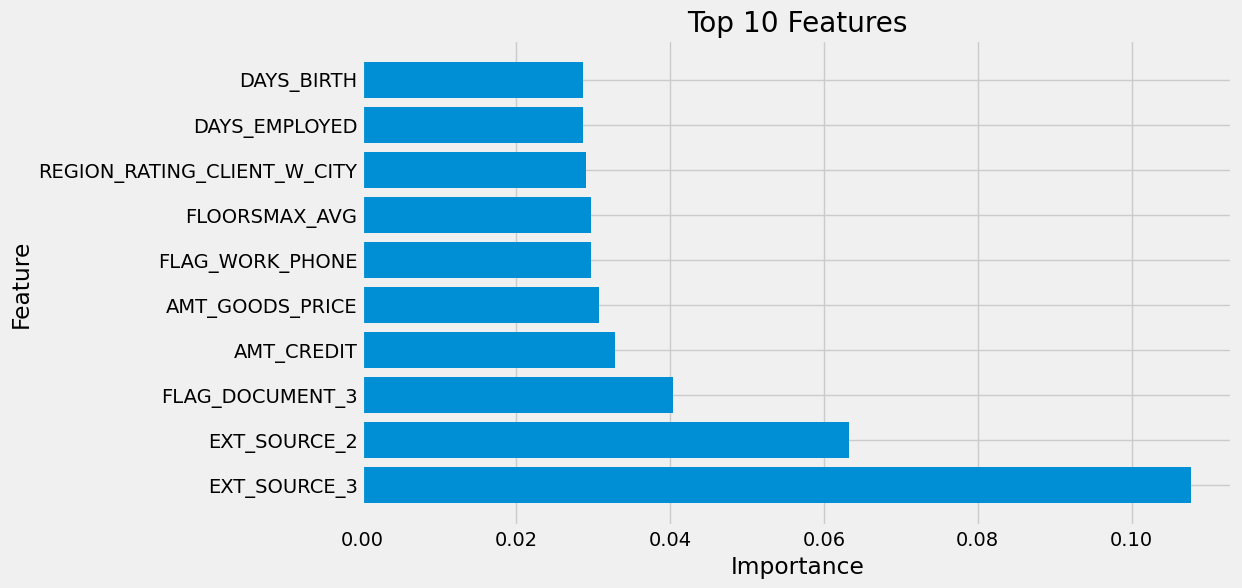

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.show()

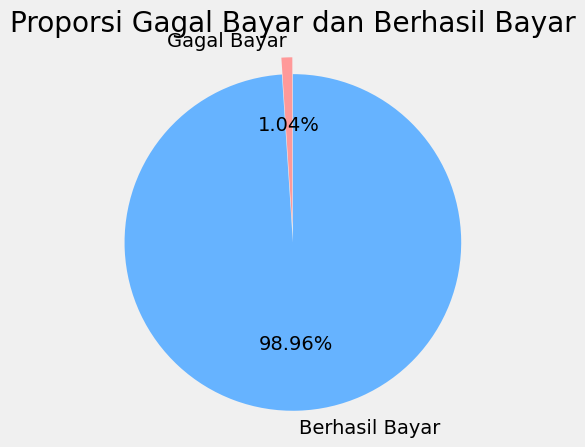

In [27]:
prediksi_target = modelxgb.predict(x_train)

jumlah_gagal_bayar = (prediksi_target == 1).sum()
jumlah_berhasil_bayar = (prediksi_target ==0).sum()

persentase_gagal_bayar = (jumlah_gagal_bayar/len(prediksi_target))*100
persentase_berhasil_bayar = (jumlah_berhasil_bayar/len(prediksi_target))*100

labels = ['Gagal Bayar','Berhasil Bayar']
sizes = [persentase_gagal_bayar,persentase_berhasil_bayar]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Proporsi Gagal Bayar dan Berhasil Bayar')
plt.show()

In [28]:
total_gagal_bayar_sebelum = len(data[data['TARGET'] == 1])
total_data_sebelum = len(data)
LGD_sebelum = (total_gagal_bayar_sebelum / total_data_sebelum) * 100

prediksi_target = modelxgb.predict(x_train)
total_gagal_bayar_setelah = len(prediksi_target[prediksi_target == 1])
total_data_setelah = len(x_train)
LGD_setelah = (total_gagal_bayar_setelah / total_data_setelah) * 100

penurunan_LGD = LGD_sebelum - LGD_setelah
persentase_penurunan_LGD = (penurunan_LGD / LGD_sebelum) * 100

print("LGD sebelum pemodelan:", LGD_sebelum)
print("LGD setelah pemodelan:", LGD_setelah)
print("Penurunan LGD:", penurunan_LGD)
print("Persentase Penurunan LGD:", persentase_penurunan_LGD)

LGD sebelum pemodelan: 7.815331069899169
LGD setelah pemodelan: 1.03748315220173
Penurunan LGD: 6.777847917697438
Persentase Penurunan LGD: 86.72502619629758
